In [19]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
#loading the dataset
df=pd.read_csv('/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv')
#showing the dataset
df

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


In [21]:
#checking for preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [22]:
#checking for missing value 
df.isna().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [ ]:
Helping Function****

In [23]:
def encode_date(df,column):
    df=df.copy()

    df[column]=pd.to_datetime(df[column])

    df[column+'_year']=df[column].apply(lambda x:x.year)
    df[column+'_month']=df[column].apply(lambda x:x.month)
    df[column+'_day']=df[column].apply(lambda x:x.day)
    df[column+'_hour']=df[column].apply(lambda x:x.hour)
    df[column+'_minute']=df[column].apply(lambda x:x.minute)
    df[column+'_second']=df[column].apply(lambda x:x.second)
    df=df.drop(column,axis=1)
    return df


In [24]:
#creating function to extract number of male and female

def get_male_counts(x):
    count=0
    for gender in str(x).split(','):
        if gender=='male':
            count+=1
    return count

def get_female_counts(x):
    count=0
    for gender in str(x).split(','):
        if gender=='female':
            count+=1
    return count

In [25]:
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    for column in df.columns:
        if df[column].dtypes=='bool':
            df[column]=df[column].astype(int)
    return df

In [26]:
def preprocess_inputs(df):
    #creating copy of the dataset
    df=df.copy()
    #dropping id column

    df=df.drop('id',axis=1)
    #dropping tags  and use column

    df=df.drop(['tags','use'],axis=1)
    #dropping country column
    #redundant information
    df=df.drop(['country','date'],axis=1)

    #dropping region column high cardinality

    df=df.drop('region',axis=1)
    
    
    #extracting date features


    for column in ['posted_time','disbursed_time','funded_time']:
        df=encode_date(df,column)


    #engineering gender count  column


    df['male_count']=df['borrower_genders'].apply(get_male_counts)
    df['female_count']=df['borrower_genders'].apply(get_female_counts)
    
    df=df.drop('borrower_genders',axis=1)


    
    onehot_columns=['activity','sector','country_code','currency','partner_id']

    prefixes=['act','sect','ctc','curr','pid']

    df=onehot_encode(df,onehot_columns,prefixes)

    #splitting df into x and y

    y=df['repayment_interval']
    X=df.drop('repayment_interval',axis=1)

    label_mapping={'bullet':0,'weekly':1,'monthly':2,'irregular':3}

    y=y.replace(label_mapping)

    #filling remaining missing value with the mean of that column

    missing_value_columns=df.loc[:,df.isna().sum()>1].columns

    for column in missing_value_columns:
        X[column]=X[column].fillna(X[column].mean())


    #trrain_test_split

    x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=123,shuffle=True)

    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
    return x_train,x_test,y_train,y_test

In [27]:
def evaluate_model(model,x_test,y_test):
    results=model.evaluate(x_test,y_test)
    print('       Test Loss{:.5f}'.format(results[0]))
    print('       Test Accuracy {:.2f}'.format(results[1]*100))

    y_pred=model.predict(x_test)
    y_pred=np.argmax(y_pred,axis=1)
    cm=confusion_matrix(y_test,y_pred)
    clr=classification_report(y_test,y_pred)

    plt.figure(figsize=(10,10))

    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues',cbar=False)
    plt.xticks(np.arange(4)+0.5,['bullet','weekly','monthly','irregular'])
    plt.yticks(np.arange(4)+0.5,['bullet','weekly','monthly','irregular'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    print('Classification Report',clr)









In [28]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

/tmp/ipykernel_85/1325300547.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y=y.replace(label_mapping)


(469843, 721)
(201362, 721)
(469843,)
(201362,)


# **Constructing the Model******

In [29]:
inputs=tf.keras.Input(shape=(721,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(4,activation='softmax')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)])



Epoch 1/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9053 - loss: 0.2455 - val_accuracy: 0.9390 - val_loss: 0.1571
Epoch 2/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9432 - loss: 0.1443 - val_accuracy: 0.9481 - val_loss: 0.1352
Epoch 3/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9520 - loss: 0.1245 - val_accuracy: 0.9518 - val_loss: 0.1271
Epoch 4/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9549 - loss: 0.1166 - val_accuracy: 0.9530 - val_loss: 0.1227
Epoch 5/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9569 - loss: 0.1105 - val_accuracy: 0.9555 - val_loss: 0.1170
Epoch 6/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9586 - loss: 0.1075 - val_accuracy: 0.9565 - val_loss: 0.1183
Epoch 7/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9598 - loss: 0.1043 - val_accuracy: 0.9562 - val_loss: 0.1185
Epoch 8/100
11747/11747 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - ac

6293/6293 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9580 - loss: 0.1137
       Test Loss0.11321
       Test Accuracy 95.86
6293/6293 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


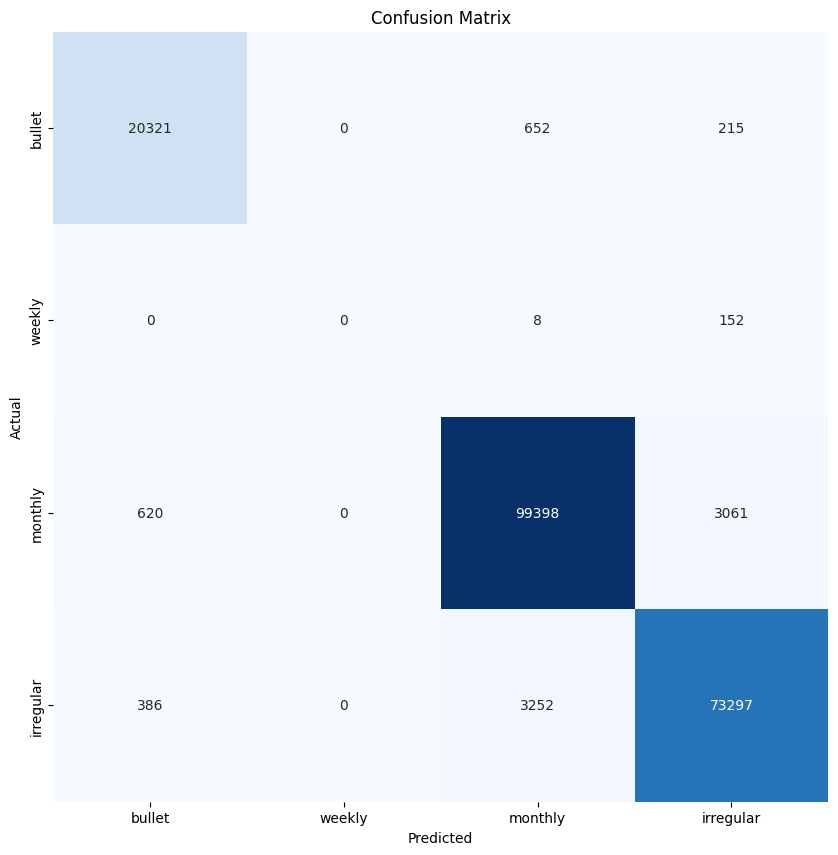

Classification Report               precision    recall  f1-score   support

           0       0.95      0.96      0.96     21188
           1       0.00      0.00      0.00       160
           2       0.96      0.96      0.96    103079
           3       0.96      0.95      0.95     76935

    accuracy                           0.96    201362
   macro avg       0.72      0.72      0.72    201362
weighted avg       0.96      0.96      0.96    201362



In [30]:
evaluate_model(model,x_test,y_test)

In [ ]:
x_train

In [ ]:
X.loc[:,X.isna().sum()>1].columns

In [ ]:
y

In [ ]:
x['female_count'].sum()

In [ ]:
x.isna().mean()

In [ ]:
{column:len(list(df[column].unique()))for column in x.columns}